# Section 4: Hands-On Data Analysis Lab

We will practice all that you’ve learned in a hands-on lab. This section features a set of analysis tasks that provide opportunities to apply the material from the previous sections. This lab comes in 2 formats &ndash; select the one that is most appropriate:

- [Live Session](../notebooks/4-hands_on_data_analysis_lab.ipynb#Live-Session)
- [Asynchronous Session](#Asynchronous-Session)

## Asynchronous Session

The lab tasks for the asynchronous session can be found below. Note that these are different from those in the live session. Sample solutions can be found [here](solutions.ipynb).

### About the Data

We will be using 2019 flight statistics from the United States Department of Transportation’s Bureau of Transportation Statistics (available [here](https://www.transtats.bts.gov/DL_SelectFields.asp?gnoyr_VQ=FMF&QO_fu146_anzr=Nv4%20Pn44vr45) and in this repository as `data/T100_MARKET_ALL_CARRIER.zip`). It contains 321,409 rows and 41 columns. Note that you don't need to unzip the file to read it in with `pd.read_csv()`.

#### Exercises

##### 1. Read in the data and convert the column names to lowercase to make them easier to work with.

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('data/T100_MARKET_ALL_CARRIER.zip')
df.columns = df.columns.str.lower()
df

,passengers,freight,mail,distance,unique_carrier,airline_id,unique_carrier_name,unique_carrier_entity,region,carrier,...,dest_state_nm,dest_country,dest_country_name,dest_wac,year,quarter,month,distance_group,class,data_source
0,0.0,53185.0,0.0,8165.0,EK,20392,Emirates,9678A,I,EK,...,Texas,US,United States,74,2019,1,3,17,G,IF
1,0.0,9002.0,0.0,6849.0,EK,20392,Emirates,9678A,I,EK,...,New York,US,United States,22,2019,1,3,14,G,IF
2,0.0,2220750.0,0.0,7247.0,EK,20392,Emirates,9678A,I,EK,...,Illinois,US,United States,41,2019,1,3,15,G,IF
3,0.0,1201490.0,0.0,8165.0,EK,20392,Emirates,9678A,I,EK,...,NaN,AE,United Arab Emirates,678,2019,1,3,17,G,IF
4,0.0,248642.0,0.0,6849.0,EK,20392,Emirates,9678A,I,EK,...,NaN,AE,United Arab Emirates,678,2019,1,3,14,G,IF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321404,96984.0,505308.0,15979.0,1448.0,AS,19930,Alaska Airlines Inc.,06031,D,AS,...,Washington,US,United States,93,2019,3,7,3,F,DU
321405,97011.0,473666.0,55963.0,1448.0,AS,19930,Alaska Airlines Inc.,06031,D,AS,...,Alaska,US,United States,1,2019,2,6,3,F,DU
321406,97098.0,592775.0,18834.0,1448.0,AS,19930,Alaska Airlines Inc.,06031,D,AS,...,Washington,US,United States,93,2019,3,8,3,F,DU
321407,97329.0,210292.0,5431.0,404.0,DL,19790,Delta Air Lines Inc.,01260,D,DL,...,Georgia,US,United States,34,2019,1,3,1,F,DU


##### 2. What columns are in the data?

In [2]:
print(df.columns)

Index(['passengers', 'freight', 'mail', 'distance', 'unique_carrier',
       'airline_id', 'unique_carrier_name', 'unique_carrier_entity', 'region',
       'carrier', 'carrier_name', 'carrier_group', 'carrier_group_new',
       'origin_airport_id', 'origin_airport_seq_id', 'origin_city_market_id',
       'origin', 'origin_city_name', 'origin_state_abr', 'origin_state_fips',
       'origin_state_nm', 'origin_country', 'origin_country_name',
       'origin_wac', 'dest_airport_id', 'dest_airport_seq_id',
       'dest_city_market_id', 'dest', 'dest_city_name', 'dest_state_abr',
       'dest_state_fips', 'dest_state_nm', 'dest_country', 'dest_country_name',
       'dest_wac', 'year', 'quarter', 'month', 'distance_group', 'class',
       'data_source'],
      dtype='object')


##### 3. How many distinct carrier names are in the dataset?

In [3]:
print(len(df['unique_carrier_name'].unique()))

318


##### 4. Calculate the totals of the `distance`, `freight`, `mail`, and `passengers` columns for flights from the United Kingdom to the United States.

In [4]:
q4 = df[(df['origin_country_name'] == 'United Kingdom') & (df['dest_country_name'] == 'United States')]
q4 = q4.groupby('dest_country_name')['distance','freight','mail','passengers'].sum()
q4['totals'] = q4['distance'] + q4['freight'] + q4['mail'] + q4['passengers']
q4


<ipython-input-4-21e4b2c8454a>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  q4 = q4.groupby('dest_country_name')['distance','freight','mail','passengers'].sum()


,distance,freight,mail,passengers,totals
dest_country_name,,,,,
United States,6478403.0,903296879.0,29838395.0,10685608.0,950299285.0


##### 5. Find the top 5 carriers for distance traveled.

In [5]:
q5 = df.groupby('unique_carrier_name')['distance'].sum().sort_values(ascending = False).head(5)
q5

unique_carrier_name
Southwest Airlines Co.         47564700.0
United Air Lines Inc.          36240281.0
Delta Air Lines Inc.           29549296.0
American Airlines Inc.         22637963.0
Federal Express Corporation    14421870.0
Name: distance, dtype: float64

##### 6. Find the total cargo transported (mail + freight) and distance traveled for the 10 carriers that transported the most cargo.

In [6]:
q5 = df.groupby('unique_carrier_name')['mail','freight','distance'].sum()
q5['cargo'] = q5['mail'] + q5['freight']
q5 = q5.drop(columns = ['mail','freight'])
q5 = q5.sort_values(by = 'cargo', ascending = False)
q5.head(10)

<ipython-input-6-0a32466586e6>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  q5 = df.groupby('unique_carrier_name')['mail','freight','distance'].sum()


,distance,cargo
unique_carrier_name,,
Federal Express Corporation,14421870.0,1.270966e+10
United Parcel Service,7317739.0,9.173867e+09
Atlas Air Inc.,6535594.0,3.356847e+09
United Air Lines Inc.,36240281.0,1.577892e+09
American Airlines Inc.,22637963.0,1.353074e+09
Kalitta Air LLC,3230102.0,1.272180e+09
Polar Air Cargo Airways,1481214.0,1.199386e+09
Delta Air Lines Inc.,29549296.0,1.129524e+09
China Airlines Ltd.,1258908.0,8.370799e+08


##### 7. Which 10 carriers flew the most passengers out of the United States to another country?

In [20]:
q7 = df[(df['origin_country_name'] == 'United States') & (df['dest_country_name']!='United States')]
q7_carrier = q7.groupby('unique_carrier_name')['passengers'].sum()
q7_carrier = q7_carrier.reset_index()
q7_carrier.columns = ['unique_carrier_name','passengers']
q7_carrier = q7_carrier.sort_values(by = 'passengers',ascending = False)
q7_carrier.index = q7_carrier['unique_carrier_name']
q7_carrier = q7_carrier.drop(columns = ['unique_carrier_name'])
q7_10 = q7_carrier.head(10)
q7_10

,passengers
unique_carrier_name,
American Airlines Inc.,14867653.0
United Air Lines Inc.,14427923.0
Delta Air Lines Inc.,13054230.0
JetBlue Airways,4522492.0
British Airways Plc,3758945.0
Lufthansa German Airlines,3123611.0
Westjet,2626600.0
Air Canada,2540855.0
Southwest Airlines Co.,2146960.0


##### 8. For each of the carriers found in *#7*, find the most popular destination country outside of the United States.

In [23]:
q8 = q7[q7['unique_carrier_name'].isin(q7_10.index)]
q8 = q8.groupby('unique_carrier_name')['dest_country_name'].agg(lambda x:x.value_counts().index[0])
q8 = q8.reset_index()
q8.columns = ['unique_carrier_name', 'country']
q8

,unique_carrier_name,country
0,Air Canada,Canada
1,American Airlines Inc.,Mexico
2,British Airways Plc,United Kingdom
3,Delta Air Lines Inc.,Mexico
4,JetBlue Airways,Dominican Republic
5,Lufthansa German Airlines,Germany
6,Southwest Airlines Co.,Mexico
7,United Air Lines Inc.,Mexico
8,Virgin Atlantic Airways,United Kingdom
9,Westjet,Canada


##### 9. For each of the carriers found in *#7*, find the total number of passengers flown on international flights to/from the destinations in *#8* or the United States. Note that this dataset only has data for flights with an origin and/or destination of the United States.

In [34]:
q9 = df[df['unique_carrier_name'].isin(q7_10.index)]
q9 = q9[((q9['dest_country_name'] == 'United States') & (q9['origin_country_name'].isin(q8['country']))) |((q9['dest_country_name'].isin(q8['country'])) & (q9['origin_country_name'] == 'United States')) ]
q9 = q9.groupby('unique_carrier_name')['passengers'].sum()
q9

unique_carrier_name
Air Canada                    5044089.0
American Airlines Inc.       11091254.0
British Airways Plc           7531344.0
Delta Air Lines Inc.          8914478.0
JetBlue Airways               3770798.0
Lufthansa German Airlines     6298202.0
Southwest Airlines Co.        2284341.0
United Air Lines Inc.        12237405.0
Virgin Atlantic Airways       4140090.0
Westjet                       5273827.0
Name: passengers, dtype: float64

##### 10. Between which two cities were the most passengers flown? Make sure to account for both directions.

In [73]:
q10 = df.copy()
q10['route'] = df[['dest_city_name', 'origin_city_name']].apply(lambda x: tuple(sorted(x)), axis=1)
q10_psg = q10.groupby('route')['passengers'].sum().sort_values(ascending = False)
q10_psg = q10_psg.reset_index()
q10_psg.columns = ['route', 'passengers']
q10_psg.head(1)

,route,passengers
0,"(Chicago, IL, New York, NY)",4131579.0


##### 11. Find the top 3 carriers for the pair of cities found in *#10* and calculate the percentage of passengers each accounted for.

In [76]:
pop_cities = q10_psg.head(1)
q11 = q10[q10['route'].isin(pop_cities['route'])]
q11 = q11.groupby('unique_carrier_name')['passengers'].sum().sort_values(ascending = False)
q11 = q11.reset_index()
q11.columns = ['carrier', 'passengers']
q11['percentage'] = q11['passengers']/q10_psg['passengers'].iloc[0] * 100
q11.head(3)

,carrier,passengers,percentage
0,American Airlines Inc.,1293395.0,31.305102
1,United Air Lines Inc.,959657.0,23.227367
2,Delta Air Lines Inc.,550882.0,13.333450


##### 12. Find the percentage of international travel per country using total passengers on class F flights.

In [105]:
q12 = df[ (df['class'] == 'F') & (df['origin_country_name'] != df['dest_country_name'])]
q12 = q12.groupby('origin_country_name')['passengers'].sum()
q12 = q12 / q12.sum() *100
q12

origin_country_name
Anguilla                0.002458
Antigua and Barbuda     0.064082
Argentina               0.378949
Aruba                   0.372053
Australia               0.687927
                         ...    
United Kingdom          4.390920
United States          49.872879
Uruguay                 0.024440
Uzbekistan              0.011837
Venezuela               0.017166
Name: passengers, Length: 109, dtype: float64

##### 13. Using a crosstab, find the percentage of total passengers on class F international flights between US cities and the countries found in *#12* that used the carriers found in *#11*. 

In [115]:
def us_cities_func(x):
    if x['origin_country_name'] == 'United States':
        return x['origin_city_name']
    else:
        return x['dest_city_name']

def other_countries_func(x):
    if x['origin_country_name'] == 'United States':
        return x['dest_country_name']
    else:
        return x['origin_country_name']


q13 = df[(df['class'] == 'F') & (df['origin_country_name'] != df['dest_country_name'])]
q13 = q13[q13['unique_carrier_name'].isin(q11['carrier'].head(3))]
q13['us cities'] = q13.apply(us_cities_func, axis=1)
q13['other countries'] = q13.apply(other_countries_func, axis=1)
ct = pd.crosstab(q13['us cities'], q13['other countries'], values=q13['passengers'], aggfunc=np.sum)
ct / ct.sum()

other countries,Antigua and Barbuda,Argentina,Aruba,Australia,Barbados,Belgium,Belize,Bermuda,Bolivia,"Bonaire, Sint Eustatius, and Saba",...,Spain,Sweden,Switzerland,Taiwan,The Bahamas,Trinidad and Tobago,Turks and Caicos Islands,United Kingdom,Uruguay,Venezuela
us cities,,,,,,,,,,,,,,,,,,,,,
"Albany, NY",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Albuquerque, NM",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,0.000019,NaN,NaN,NaN,NaN
"Allentown/Bethlehem/Easton, PA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Anchorage, AK",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Atlanta, GA",0.044844,0.129138,0.137896,NaN,NaN,0.127623,0.186597,0.146064,NaN,0.326962,...,0.097024,NaN,0.054901,NaN,0.319827,0.000069,0.185385,0.044409,0.000025,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Tucson, AZ",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Tulsa, OK",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN
"Washington, DC",NaN,0.000000,0.016342,NaN,NaN,0.226877,0.000014,0.040039,NaN,NaN,...,0.046356,NaN,0.269945,NaN,0.002070,0.000167,0.010459,0.054811,NaN,NaN


##### 14. Create a pivot table showing the total passengers transported between cities in the United States and other countries by the carriers identified in *#7*. Select the top 10 US cities and top 10 international countries from the result.

In [118]:
q14 = df[(df['unique_carrier_name'].isin(q7_10.index)) & (df['origin_country_name'] != df['dest_country_name'])]
q14['us cities'] = q14.apply(us_cities_func, axis=1)
q14['other countries'] = q14.apply(other_countries_func, axis=1)
pivot_14 = q14.pivot_table(index='us cities', columns='other countries', values='passengers', aggfunc=np.sum)
pivot_14

<ipython-input-118-5cf91f803409>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q14['us cities'] = q14.apply(us_cities_func, axis=1)
<ipython-input-118-5cf91f803409>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q14['other countries'] = q14.apply(other_countries_func, axis=1)


other countries,Antigua and Barbuda,Argentina,Aruba,Australia,Barbados,Belgium,Belize,Bermuda,Bolivia,"Bonaire, Sint Eustatius, and Saba",...,Spain,Sweden,Switzerland,Taiwan,The Bahamas,Trinidad and Tobago,Turks and Caicos Islands,United Kingdom,Uruguay,Venezuela
us cities,,,,,,,,,,,,,,,,,,,,,
"Albany, NY",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Albuquerque, NM",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN
"Allentown/Bethlehem/Easton, PA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Anchorage, AK",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Atlanta, GA",11564.0,159740.0,147144.0,NaN,NaN,89935.0,107109.0,75547.0,NaN,29099.0,...,224404.0,NaN,43320.0,NaN,400147.0,26.0,107410.0,773873.0,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Tulsa, OK",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
"Washington, DC",NaN,0.0,17430.0,NaN,NaN,159879.0,8.0,20840.0,NaN,NaN,...,107215.0,NaN,213000.0,NaN,7025.0,63.0,6060.0,859216.0,NaN,NaN
"West Palm Beach/Palm Beach, FL",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,158.0,NaN,NaN,NaN


In [120]:
pivot_14.sum(axis=1).sort_values(ascending=False).head(10)

us cities
New York, NY             16577549.0
Miami, FL                12678812.0
Atlanta, GA              10544357.0
Newark, NJ                9280644.0
Los Angeles, CA           8556306.0
Houston, TX               7897783.0
San Francisco, CA         6985975.0
Chicago, IL               6739938.0
Dallas/Fort Worth, TX     6661909.0
Fort Lauderdale, FL       4137668.0
dtype: float64

In [119]:
pivot_14.sum(axis=0).sort_values(ascending=False).head(10)

other countries
United Kingdom        18824895.0
Mexico                15876984.0
Canada                15241773.0
Germany                9924151.0
Dominican Republic     6718025.0
Japan                  4722664.0
Jamaica                3832619.0
Netherlands            3769842.0
France                 3385561.0
China                  3041560.0
dtype: float64

##### 15: For the top 15 international countries, find the percentage of class F passengers traveling to/from the top 10 US cities for international travel (e.g. if only cities A, B, and C flew into Aruba, the sum of the Aruba row/column would be 1). Plot the result as a heatmap.

<ipython-input-127-81ff7188d09f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q15['us cities'] = q15.apply(us_cities_func, axis=1)
<ipython-input-127-81ff7188d09f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  q15['international countries'] = q15.apply(other_countries_func, axis=1)


<AxesSubplot:xlabel='international countries', ylabel='us cities'>

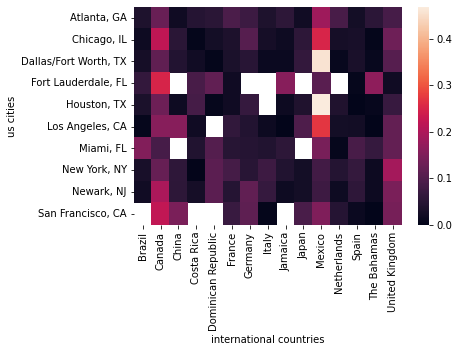

In [127]:
top10_us_cities = pivot_14.sum(axis=1).sort_values(ascending=False).head(10).index
top15_inter_countries = pivot_14.sum(axis=0).sort_values(ascending=False).head(15).index

q15 = df[(df['class'] == 'F') & (df['origin_country'] != df['dest_country'])]
q15['us cities'] = q15.apply(us_cities_func, axis=1)
q15['international countries'] = q15.apply(other_countries_func, axis=1)
q15 = q15[(q15['us cities'].isin(top10_us_cities)) & (q15['international countries'].isin(top15_inter_countries))]
q15 = q15.pivot_table(index='us cities', columns='international countries', values='passengers', aggfunc=np.sum)

a = q15.sum(axis=1).copy()
p = q15.div(a, axis='rows').copy()
sns.heatmap(p)